In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sfma.api import SFMAModel

In [6]:
# gdp = pd.read_csv("../data/gdp.csv")
# gdp = pd.melt(gdp[["Country Name"] + [str(x) for x in np.arange(1960, 2020)]], id_vars=["Country Name"])
# gdp.columns = ["country", "year", "gdp"]
# gdp.head()

,country,year,gdp
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,127.6515181
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,107.9637786
4,Angola,1960,NaN


In [12]:
# le = pd.read_csv("../data/le.csv")
# le = pd.melt(le[["Country Name"] + [str(x) for x in np.arange(1960, 2020)]], id_vars=["Country Name"])
# le.columns = ["country", "year", "lex"]
# le.head()

,country,year,lex
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000


In [36]:
df = pd.read_csv("../data/gdp-le.csv")

In [37]:
# df = gdp.merge(le, on=["country", "year"])
df = df.loc[~np.isnan(df.gdp.values)]
df = df.loc[~np.isnan(df[["le"]].values)]
# df.head()
df["int"] = 1.
df["null"] = 1e-3
df["log.le"] = np.log(df["le"])
df["log.gdp"] = np.log(df["gdp"])

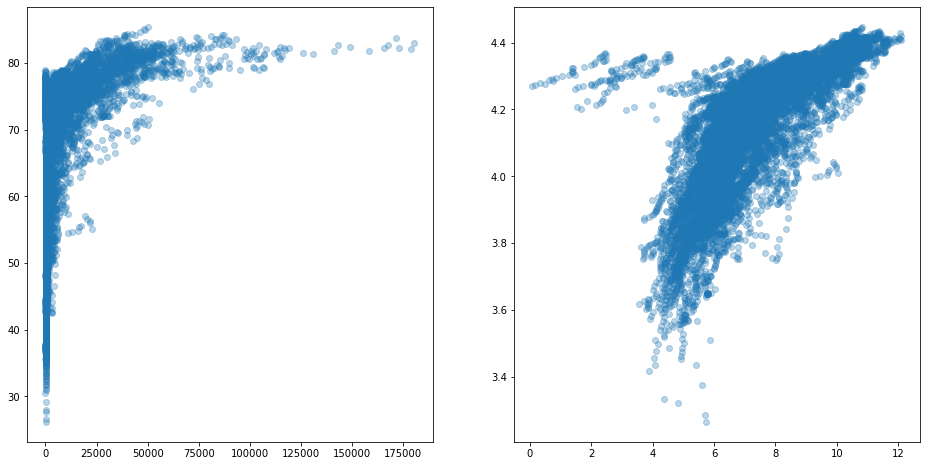

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].scatter(df[["gdp"]], df[["le"]], alpha=0.3)
ax[1].scatter(np.log(df[["gdp"]]), np.log(df[["le"]]), alpha=0.3)

In [23]:
df.head()

,Unnamed: 0,country,year,gdp,le,int,null,log.le,log.gdp
2,3,Afghanistan,1962,58.458009,33.471,1.0,0.001,3.510679,4.068309
3,4,Afghanistan,1963,78.706429,33.971,1.0,0.001,3.525507,4.365725
4,5,Afghanistan,1964,82.095307,34.463,1.0,0.001,3.539886,4.407881
5,6,Afghanistan,1965,101.108325,34.948,1.0,0.001,3.553861,4.616192
6,7,Afghanistan,1966,137.594298,35.430,1.0,0.001,3.567559,4.924309


In [39]:
model = SFMAModel(
    df=df,
    col_output='le',
    col_se='int',
    col_input='gdp',
    # concave=True,
    # include_gamma=True,
    # increasing=True,
    pct_trimming=0.0
)
model2 = SFMAModel(
    df=df,
    col_output='le',
    col_se='int',
    col_input='gdp',
    concave=True,
    # include_gamma=True,
    # increasing=True,
    # r_linear=True,
    pct_trimming=0.0
)
model3 = SFMAModel(
    df=df,
    col_output='le',
    col_se='int',
    col_input='gdp',
    concave=True,
    # include_gamma=True,
    increasing=True,
    pct_trimming=0.0
)
# model4 = SFMAModel(
#     df=df,
#     col_output='le',
#     col_se='null',
#     col_input='gdp',
#     concave=True,
#     include_gamma=True,
#     increasing=True,
#     pct_trimming=0.0
# )
# model5 = SFMAModel(
#     df=df,
#     col_output='le',
#     col_se='int',
#     col_input='gdp',
#     concave=True,
#     # include_gamma=True,
#     increasing=True,
#     pct_trimming=0.05
# )
model.fit(options={'solver_options': {}})
model2.fit(options={'solver_options': {}})
model3.fit(options={'solver_options': {}})
# model4.fit(options={'solver_options': {}})
# model5.fit(options={'solver_options': {}})

/opt/miniconda3/envs/sfma/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


In [40]:
preds = model.predict()
df['predictions'] = preds
preds2 = model2.predict()
df['predictions2'] = preds2
preds3 = model3.predict()
df['predictions3'] = preds3
# preds4 = model4.predict()
# df['predictions4'] = preds4
# preds5 = model5.predict()
# df['predictions5'] = preds5

In [68]:
model_log = SFMAModel(
    df=df,
    col_output='log.le',
    col_se='null',
    col_input='log.gdp',
    concave=True,
    # include_gamma=True,
    increasing=True,
    pct_trimming=0.0
)
model_log.fit(options={'solver_options': {}})
preds_log = model_log.predict()
df['predictions_log'] = np.exp(preds_log)

In [46]:
model_knots = SFMAModel(
    df=df,
    col_output='le',
    col_se='int',
    col_input='gdp',
    concave=True,
    knots_num=5,
    knots_type='frequency',
    # include_gamma=True,
    increasing=True,
    pct_trimming=0.0
)
model_knots.fit(options={'solver_options': {}})
preds_knots = model_knots.predict()
df["predictions_knots"] = preds_knots

/opt/miniconda3/envs/sfma/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


In [43]:
model2.solver.result

 barrier_parameter: 4.1943040000000054e-17
 barrier_tolerance: 4.1943040000000054e-17
          cg_niter: 815
      cg_stop_cond: 2
            constr: [array([-2.25574707e-08, -1.89957647e-08, -1.54340588e-08, -1.18723529e-08,
       -8.31064692e-09, -4.74894098e-09, -1.18723505e-09,  1.59758249e-16,
        3.74723405e-18, -1.52263741e-16, -3.08274743e-16, -4.64285738e-16,
       -6.20296733e-16, -7.70517017e-16, -9.09155876e-16, -1.04779474e-15,
       -1.18643359e-15, -1.32507246e-15, -1.46371133e-15, -1.60235019e-15]), array([ 73.82666508,  86.94273756,  85.99583775,  84.57548899,
        83.62858808,  83.15513665,   0.        , 220.64601951])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 1.5975824890692315e-16
    execution_time: 1.7020659446716309
               fun: 2.5801949528652126
              grad: array([ 2.08530343e-09, -5.83075781e-04,  7.42458157e-04,  9.62433222e-05,
       -7.88701689e-0

In [44]:
model_knots.solver.result

 barrier_parameter: 4.1943040000000054e-17
 barrier_tolerance: 4.1943040000000054e-17
          cg_niter: 950
      cg_stop_cond: 2
            constr: [array([ 1.17558354e-03,  3.81269519e-04,  1.16498179e-04,  1.44935073e-04,
        1.08385808e-04,  3.62741278e-05,  2.26728202e-06,  1.60266930e-10,
        1.52981240e-10,  1.38594937e-10,  1.28006279e-10,  1.22052208e-10,
        1.16163852e-10,  1.09407945e-10,  1.01923791e-10,  9.37354838e-11,
        8.43315389e-11,  7.34152006e-11,  5.45049565e-11,  2.33243511e-11,
       -1.11565724e-07, -5.57828620e-08, -1.12065318e-16, -2.32786247e-10,
       -7.46752838e-09, -5.73173598e-09, -1.43293371e-09, -2.74892049e-16,
       -1.26008004e-15, -1.39135437e-15, -8.39497663e-16, -5.74029676e-16,
       -6.66547855e-16, -7.52293053e-16, -8.24492276e-16, -9.14486892e-16,
       -1.06676600e-15, -1.34574504e-15, -2.63832472e-15, -3.93090404e-15]), array([ 7.30153117e+01,  8.08684547e+01,  8.16388178e+01,  8.52836828e+01,
        8.52836859e+

In [46]:
df.head()

,country,year,gdp,le,int,null,log.le,log.gdp,predictions_log,predictions,predictions2,predictions3,predictions_knots
2776,Italy,1970,1.088153,71.558780,1.0,0.001,4.270519,0.084482,31.119698,73.485396,73.530252,73.900766,72.974036
3042,Italy,1971,1.190790,71.806829,1.0,0.001,4.273980,0.174617,31.722145,73.485480,73.530334,73.900830,72.974161
3308,Italy,1972,1.379497,72.075366,1.0,0.001,4.277712,0.321719,32.672501,73.485635,73.530485,73.900948,72.974392
3574,Italy,1973,1.655417,72.026341,1.0,0.001,4.277032,0.504053,33.791766,73.485861,73.530705,73.901120,72.974730
3840,Italy,1974,1.870309,72.734390,1.0,0.001,4.286814,0.626104,34.503654,73.486037,73.530877,73.901254,72.974992


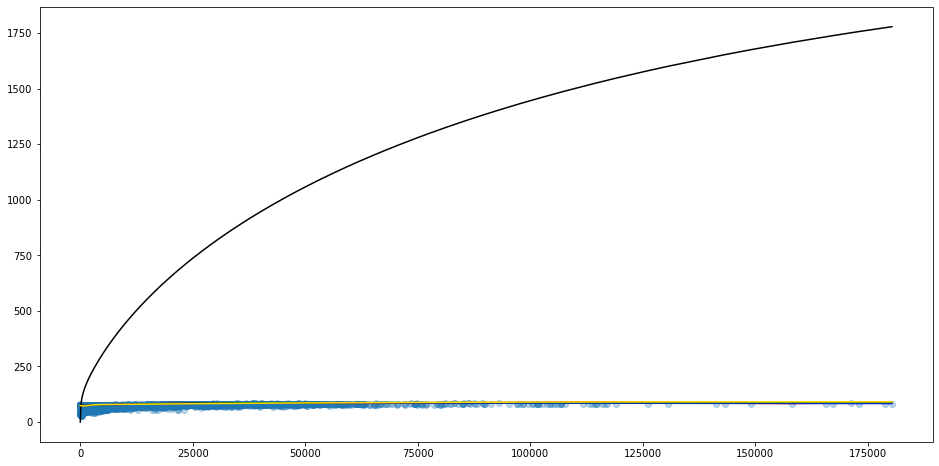

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
df.sort_values('gdp', inplace=True)
ax.scatter(df['gdp'], df['le'], alpha=0.3)
ax.plot(df['gdp'], df['predictions'], color='red')
ax.plot(df['gdp'], df['predictions2'], color='blue')
ax.plot(df['gdp'], df['predictions3'], color='green')
# ax.plot(df['gdp'], df['predictions4'], color='orange')
# ax.plot(df['gdp'], df['predictions5'], color='purple')
ax.plot(df["gdp"], df["predictions_log"], color="black")
ax.plot(df["gdp"], df["predictions_knots"], color="gold")

In [62]:
model_log.trimming.model[0].w.sum() / len(df)

0.9500000000000294

In [63]:
trimmed = model_log.trimming.model[0].w < 1.

TypeError: missing a required argument: 'x'

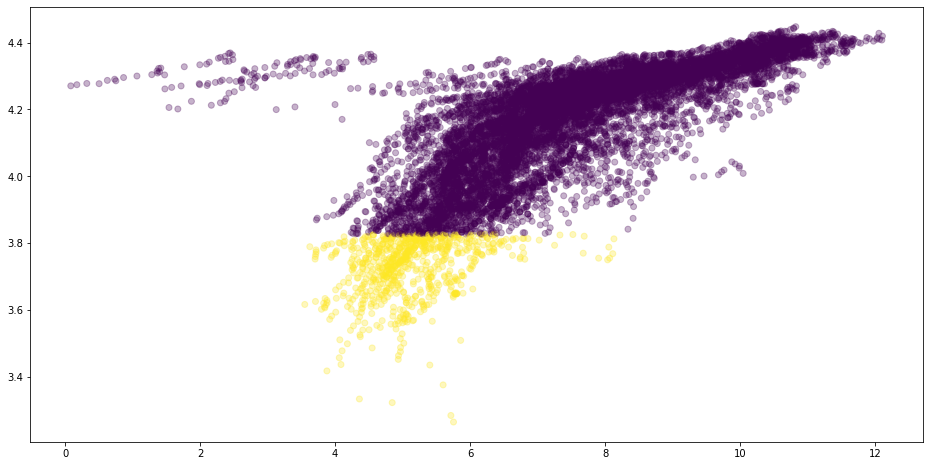

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
df.sort_values('gdp', inplace=True)
ax.scatter(df['log.gdp'], df['log.le'], alpha=0.3, c=trimmed)
ax.scatter()

ax.plot(df["log.gdp"], np.log(df["predictions_log"]), color="black")
